<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/u6_titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **EDA y Machine Learning**

Tenemos un Dataset con los pasajeros del Titanic, indicando para cada uno una serie de atributos.. y nos solicitan: Construir un modelo que nos permita estimar la posibilidad de sobrevivir, dados una serie de atributos del pasajero.

https://www.kaggle.com/c/titanic/data


# 1. Comprensión del Negocio


**Objetivo del Negocio:**

Predecir si los pasajeros sobrevivieron o no al desastre del Titanic basándonos en características.


**Objetivos del Proyecto**

Construir un modelo que nos permita estimar la posibilidad de sobrevivir, dados una serie de atributos del pasajero



# 2. Comprensión de los Datos

**Pasos**

*   Obtener los Datos: Obtener los datos desde Kaggle.
*   Análisis Exploratorio de Datos (EDA): Comprender las características principales del dataset y su estructura.


In [ ]:
# importamos librerias
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")


In [ ]:
# levantamos el csv
titanic = pd.read_csv("/content/train.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Comprensión de los datos**


*   Survived: Indicador de supervivencia (0 = No, 1 = Sí).
*   Pclass: Clase del billete (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).
*   Name: Nombre del pasajero (se elimina porque no es relevante para el modelo).
*   Sex: Sexo del pasajero (codificado como 0 o 1).
*   Age: Edad del pasajero.
*   SibSp: Número de hermanos/cónyuges a bordo del Titanic.
*   Parch: Número de padres/hijos a bordo del Titanic.
*   Ticket: Número del billete (se elimina porque no es relevante para el modelo).
*   Fare: Precio del billete.
*   Cabin: Número de cabina (se elimina por tener demasiados valores nulos).
*   Embarked: Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton, codificado como 0 o 1).




Resumiendo:
* Tienen 891 registros
* Tienen 12 columnas
* Hay columnas que tienen nulls
* Hay 2 columnas flotantes
* Hay 5 columnas enteras
* Hay 5 columnas object. Que parece tienen datos de cadenas de texto

### Puedo averiguar algo de las columnas con datos categoricos?

In [ ]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
categoricos = titanic[["Survived", "Sex", "Cabin", "Pclass", "Ticket", "Embarked"]]
categoricos.nunique()

,0
Survived,2
Sex,2
Cabin,147
Pclass,3
Ticket,681
Embarked,3


# 3. Preparación de los Datos


**Pasos:**

*    Limpieza de Datos: Manejo de valores nulos y eliminación de columnas irrelevantes.
*    Transformación de Datos: Codificación de variables categóricas y normalización de datos si es necesario.




Tengo datos nulos o NA?

In [ ]:
pd.isnull(titanic).sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Age

Algunas opciones:

* Podemos remplazarla por un valor fijo
* Podemos reemplazarla por una estadistica ej: media
* Podemos reemplazarla por una estadistica ej: mediana u otras
* Podemos reemplazarla por el resultado de una funcion a construida

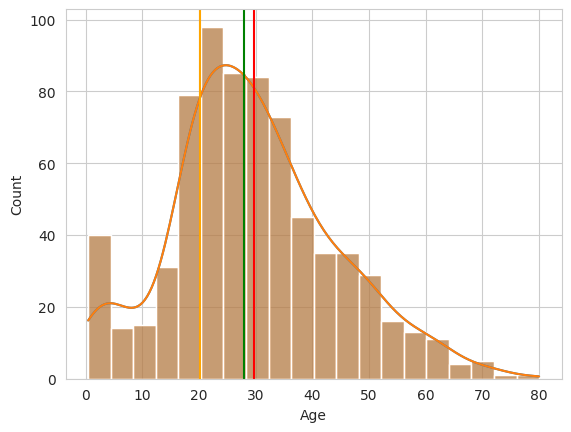

In [ ]:

ages = titanic[["Age"]]
sns.histplot(ages["Age"], kde=True)

p = ages["Age"].mean()
m = ages["Age"].median()
q25 = ages["Age"].quantile([.25]).loc[0.25]

sns.histplot(ages["Age"], kde=True)
plt.axvline(p, color="red")
plt.axvline(m, color="green")
plt.axvline(q25, color="orange")


In [ ]:

#completamos los valores faltantes con la mediana
mage = titanic["Age"].median()
titanic["Age"].fillna(mage, inplace = True)

pd.isnull(titanic).sum()


<ipython-input-77-d6517595b502>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(mage, inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Embarked

<Axes: xlabel='Embarked', ylabel='Count'>

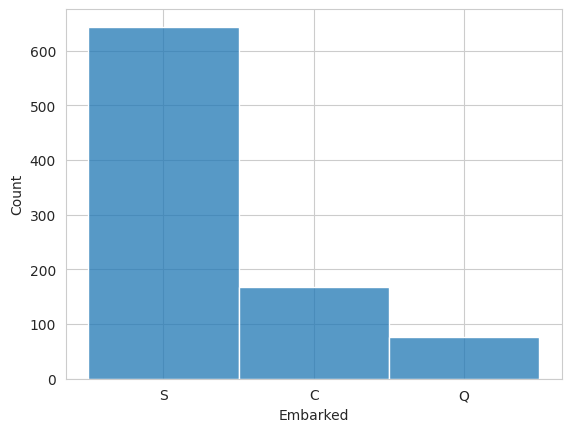

In [ ]:
emb = titanic[["Embarked"]]
sns.histplot(emb["Embarked"], kde=False)


In [ ]:
# reemplazamos nulos por S
titanic["Embarked"].fillna("S", inplace=True)

<ipython-input-79-84275a798562>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna("S", inplace=True)


In [ ]:
pd.isnull(titanic).sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Hay duplicados? Como verificamos?

In [ ]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
titanic.duplicated().sum()

0

In [ ]:
titanic.drop_duplicates(inplace=True)

**Análisis de cada variable**

### Survived

In [ ]:
# Que datos hay?
titanic["Survived"].unique()


array([0, 1])

In [ ]:
# En que proporción?
titanic["Survived"].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


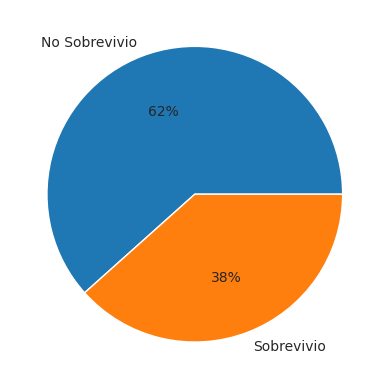

In [ ]:
# Para graficar
psurvived = titanic["Survived"].value_counts(normalize=True).sort_index()

plt.pie(psurvived, labels=["No Sobrevivio", "Sobrevivio"], autopct='%.0f%%');


## Pclass

In [ ]:
# que valores hay?
titanic["Pclass"].unique()

In [ ]:
# cuantos de cada clase
titanic["Pclass"].value_counts()

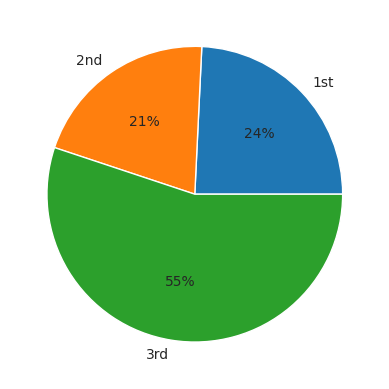

In [ ]:
# en que proporción?
titanic["Pclass"].value_counts(normalize=True).sort_index()

ppc = titanic["Pclass"].value_counts(normalize=True).sort_index()
# 1 = 1st, 2 = 2nd, 3 = 3rd
plt.pie(ppc, labels=["1st", "2nd", "3rd"], autopct='%.0f%%');


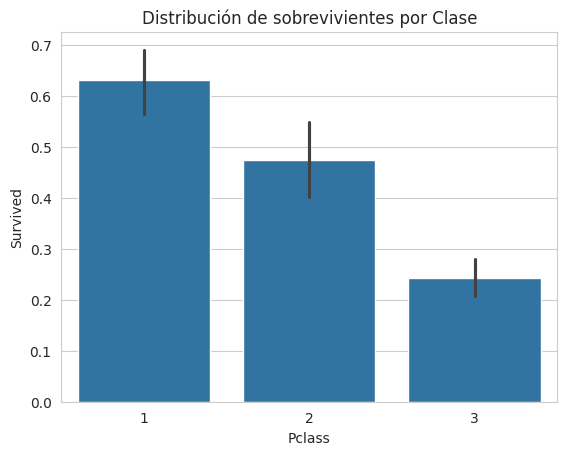

In [ ]:
# que pasa con los sobrevivientes y la clase?

sns.barplot(x="Pclass", y="Survived", data=titanic)
plt.title("Distribución de sobrevivientes por Clase")
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

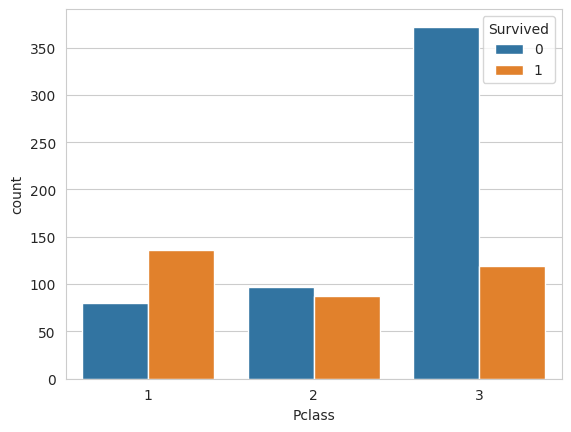

In [ ]:
sns.countplot(data=titanic, x="Pclass", hue="Survived" )

In [ ]:
# nuericamente
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Sex (Género)

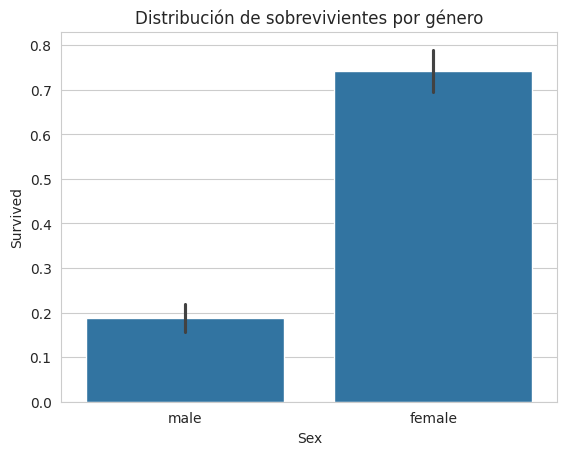

In [ ]:
sns.barplot(x="Sex", y="Survived", data=titanic)
plt.title("Distribución de sobrevivientes por género")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

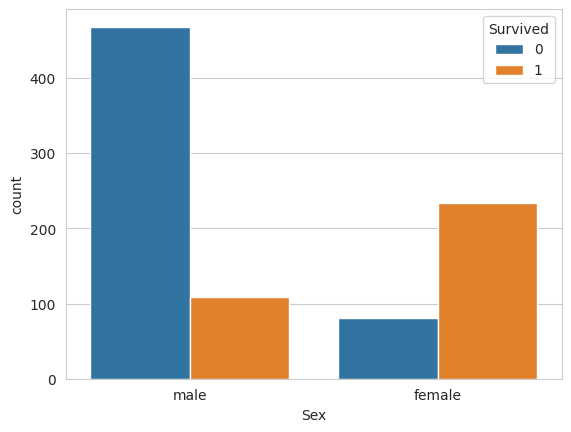

In [ ]:
sns.countplot(data=titanic, x="Sex", hue="Survived")

In [ ]:
tot_sobrevivientes_mujeres = titanic[titanic.Sex == "female"]["Survived"].sum()
tot_sobrevivientes_hombres = titanic[titanic.Sex == "male"]["Survived"].sum()

print("Total sobrevivientes: " + str((tot_sobrevivientes_mujeres + tot_sobrevivientes_hombres)))
print("Proporción de mujeres que sobrevivieron:")
print(tot_sobrevivientes_mujeres/(tot_sobrevivientes_mujeres + tot_sobrevivientes_hombres))
print("Proporción de hombres que sobrevivieron:")
print(tot_sobrevivientes_hombres/(tot_sobrevivientes_mujeres + tot_sobrevivientes_hombres))

Total sobrevivientes: 342
Proporción de mujeres que sobrevivieron:
0.6812865497076024
Proporción de hombres que sobrevivieron:
0.31871345029239767


<Axes: xlabel='Survived', ylabel='count'>

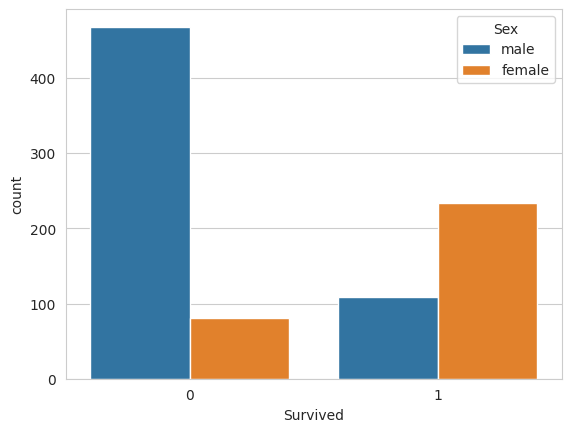

In [ ]:
sns.countplot(data=titanic, x="Survived", hue="Sex")

## Fare
La tarifa o valor del Ticket

In [ ]:
# como son los valores?
titanic[["Fare"]].describe()


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


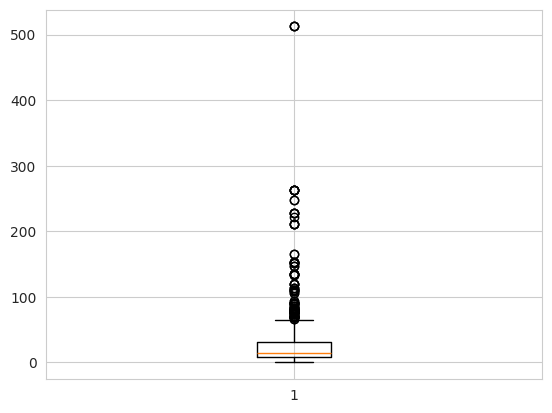

In [ ]:
#sns.catplot(titanic[["Fare"]], kind="box")
ax = plt.boxplot(titanic[["Fare"]])


In [ ]:
#cambiamos el enfoque...
# vamos a armar 3 o 4 grupos
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4)

#podemos ver el promedio y la cantidad (como funciona pd.qcut())
titanic[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


<ipython-input-96-293a72c7a7f5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


## Age

<ipython-input-97-ed12dfa8de09>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_sobrevivientes, kde=False)
<ipython-input-97-ed12dfa8de09>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_no_sobrevivientes, kde=False)


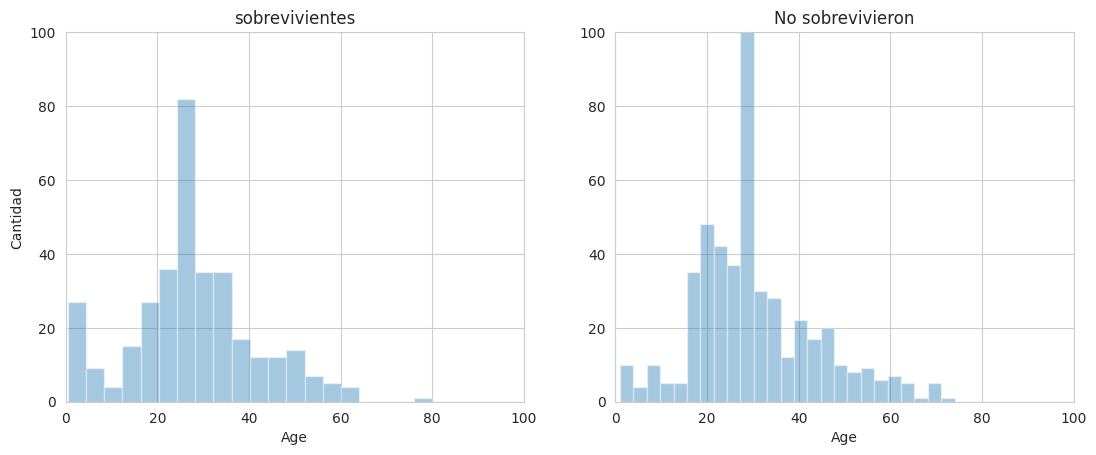

In [ ]:
edad_sobrevivientes  = titanic[titanic.Survived == 1]["Age"]
edad_no_sobrevivientes = titanic[titanic.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(edad_sobrevivientes, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("sobrevivientes")
plt.ylabel("Cantidad")
plt.subplot(1, 2, 2)
sns.distplot(edad_no_sobrevivientes, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobrevivieron")
plt.subplots_adjust(right=1.7)
plt.show()


<ipython-input-98-0bc838a802e6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_sobrevivientes, kde=False, bins=20, color="green", label='Sobrevivientes')
<ipython-input-98-0bc838a802e6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_no_sobrevivientes, kde=False, bins=20, color="red

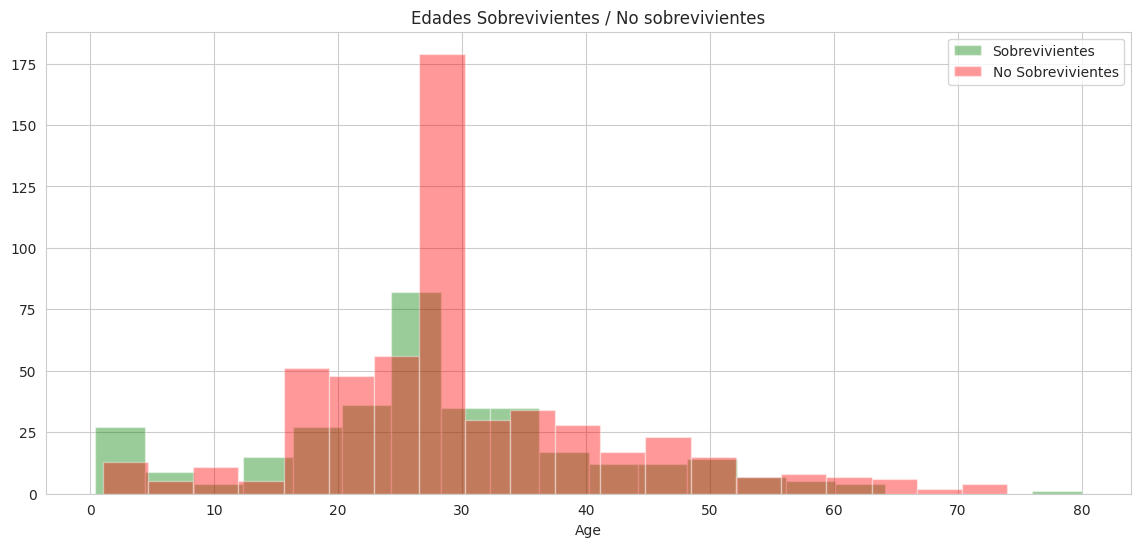

In [ ]:
# edades / sobrevivientes
plt.figure(figsize = (14,6))
plt.title('Edades Sobrevivientes / No sobrevivientes')
sns.set_color_codes("pastel")
sns.distplot(edad_sobrevivientes, kde=False, bins=20, color="green", label='Sobrevivientes')
sns.distplot(edad_no_sobrevivientes, kde=False, bins=20, color="red", label='No Sobrevivientes')
plt.legend()
plt.show()


<Axes: xlabel='Survived', ylabel='Age'>

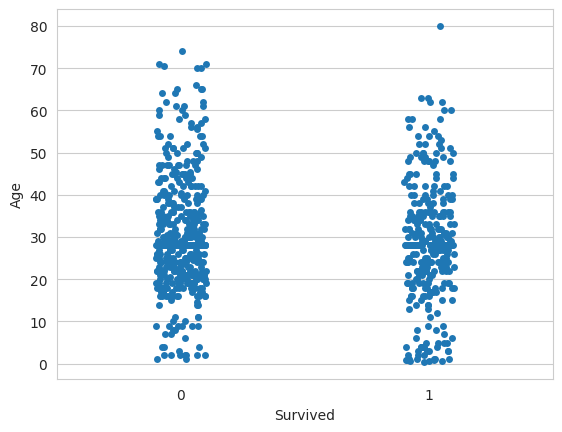

In [ ]:
sns.stripplot(x="Survived", y="Age", data=titanic, jitter=True)

## Embarked

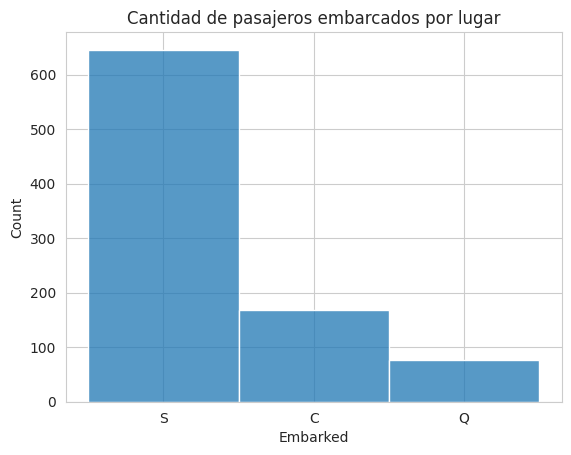

In [ ]:
emb = titanic[["Embarked"]]
sns.histplot(emb["Embarked"], kde=False)
plt.title("Cantidad de pasajeros embarcados por lugar")
plt.show()


<Axes: xlabel='Embarked', ylabel='count'>

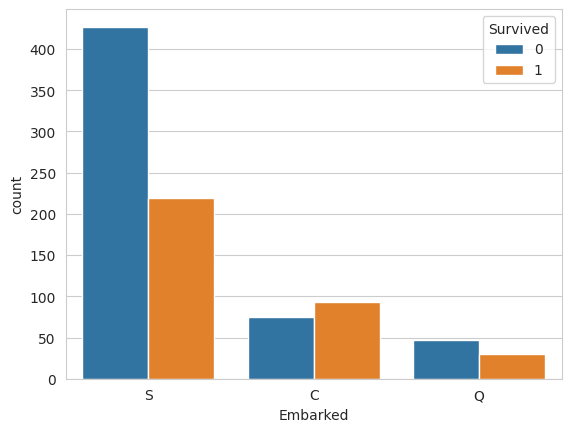

In [ ]:
sns.countplot(data=titanic, x="Embarked", hue="Survived")

In [ ]:
sns.countplot(data=titanic, x="Survived", hue="Embarked")

# Análisis multivariado: Buscamos correlaciones

In [ ]:
#calculamos coeficiente de corr de Pearson
titanic.corr(method="pearson", numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


Observamos que faltan algunos atributos importantes como el Genero (sex) y Embarked porque son categórico... lo transformamos


In [ ]:
# sex
titanic["Sex"].map( {"female": 1, "male": 0} ).astype(int)


,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [ ]:
titanic["Sex"] = titanic["Sex"].map( {"female": 1, "male": 0} ).astype(int)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,"(14.454, 31.0]"


In [ ]:
#Embarked
titanic["Embarked"]

titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [ ]:
titanic

Vemos la correlación nuevamente

In [ ]:
#calculamos coeficiente de corr de Pearson
titanic.corr(method="pearson", numeric_only=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [ ]:
# aramos una columna que represente la familia
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1


In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,"(14.454, 31.0]",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0,"(14.454, 31.0]",4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,"(14.454, 31.0]",1


Limpiamos columnas que creemos que no van a servir para el clasificador

In [ ]:
titanic.drop(labels = ["PassengerId", "Cabin", "Ticket", "Name"], axis=1, inplace=True)

In [ ]:
titanic.drop(labels = ["Fare", "FareBand"], axis=1, inplace=True)

In [ ]:
titanic.drop(labels = ["SibSp", "Parch"], axis=1, inplace=True)

In [ ]:
titanic

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,3,0,22.0,0,2
1,1,1,1,38.0,1,2
2,1,3,1,26.0,0,1
3,1,1,1,35.0,0,2
4,0,3,0,35.0,0,1
...,...,...,...,...,...,...
886,0,2,0,27.0,0,1
887,1,1,1,19.0,0,1
888,0,3,1,28.0,0,4
889,1,1,0,26.0,1,1


# 4. Modelado

**Pasos:**
*    Selección del Modelo: Elegir el modelo de machine learning apropiado.
*    Entrenamiento del Modelo: Dividir el dataset en conjuntos de entrenamiento y prueba, y entrenar el modelo.
*    Predicción: Usar el modelo entrenado para hacer predicciones.


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']


In [ ]:
X

,Pclass,Sex,Age,Embarked,FamilySize
0,3,0,22.0,0,2
1,1,1,38.0,1,2
2,3,1,26.0,0,1
3,1,1,35.0,0,2
4,3,0,35.0,0,1
...,...,...,...,...,...
886,2,0,27.0,0,1
887,1,1,19.0,0,1
888,3,1,28.0,0,4
889,1,0,26.0,1,1


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 5. Evaluación

**Pasos:**
*   Métricas de Evaluación: Utilizar métricas como accuracy, matriz de confusión, y reporte de clasificación.
*   Explicación de la Evaluación
Accuracy: La proporción de predicciones correctas entre el total de predicciones.
*   Matriz de Confusión: Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7877094972067039


vamos a predecir

In [ ]:
import numpy as np


In [ ]:
# clase
# genero
# edad
# embarque
# family size
new_data = np.array([1, 0, 3.0, 3, 4])

In [ ]:
new_data=new_data.reshape(1, -1)
prediction = model.predict(new_data)
print('Prediction:', prediction)


Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


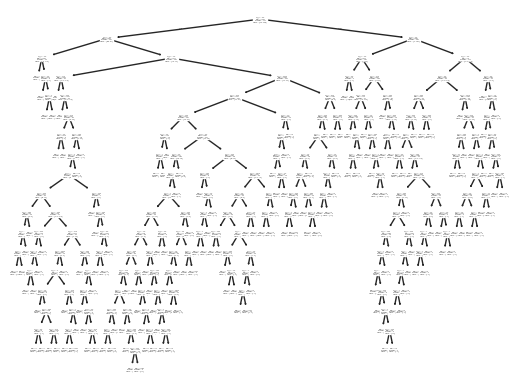

In [ ]:
from sklearn import tree
tree.plot_tree(model)
plt.show()


# 6. Despliegue

**Pasos:**
*   Guardado del Modelo: Guardar el modelo entrenado para uso futuro.
*   Carga del Modelo: Demostrar cómo cargar el modelo guardado.


In [ ]:
import joblib

In [ ]:
# Guardar el modelo
joblib.dump(model, 'titanic_model.pkl')

# Cargar el modelo (ejemplo)
loaded_model = joblib.load('titanic_model.pkl')
